##  Project Overall Objects

This notebook file would approach and achieve the objects highlighted in **black**. Those in *<font color=green>green</font>* have already been accomplished in earlier analysis. 

- <font color=green> Clean dirty log data and transform it for analytics. </font>
- <font color=green> Exploratory Data Analysis (EDA). </font>
- <font color=green> Find the conversion rate of users, identify key factors that bottleneck the conversion rate. <font>
- <font color=green> Propose any hypothesis and test through analyzing features.</font>



- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

This notebook file is to develop machine learning models to predict user behaviors, based on selected features from the previous analyses. We would build and compare the results of Logistic Regression Models, Decision Trees (Single and Bagged), K-Nearest Neighbors (Single and Bagged), Random Forest, Gradient Boosting Tree, MLP Neural Network, and Linear & Non-Linear SVM. Lastly, we apply a hyper-parametering tuning on a selected model.

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/selected_data.csv')

In [3]:
# Browse dataset
df.head(10)

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,ileave,avg_st,browser_chrome,model_bin,os_bin,CT_bin,PRO,PRO_bin,hour,worktime
0,1.0,Hangzhou,qq,7.3,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,0,NaN,0,others,others,others,ZJ,ZJ,21,0
1,1.0,Guangzhou,chrome,56.0,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,1,921142.371,1,mac,macosx,Guangzhou,BJ,BJ,19,0
2,1.0,Guangzhou,chrome,56.0,ukcontent,2017-03-06,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0,2586.546,1,pc,windows,Guangzhou,GD,GD,23,0
3,1.0,Hangzhou,qq,9.5,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0,30.680,0,pc,windows,others,SH,SH,20,0
4,1.0,Chengdu,safari,9.0,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0,NaN,0,others,others,others,BJ,BJ,3,1
5,1.0,Zhengzhou,chrome,56.0,others,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,0,4.170,1,mac,macosx,others,BJ,BJ,19,0
6,0.0,Bangkok,chrome,56.0,others,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,1,35.747,1,pc,windows,others,ZJ,ZJ,17,0
7,1.0,Beijing,na,-1.0,others,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,1,18.916,0,others,others,Beijing,GD,GD,2,1
8,1.0,NaN,micromessenger,6.5,ukcontent,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,0,NaN,0,others,others,others,BJ,BJ,17,0
9,1.0,Wuhan,qq,6.0,others,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,0,NaN,0,others,others,others,JS,others,6,1


In [4]:
# Show summary stats
df.describe()

,CN,browser_v,freq,is_fd,is_ft,os_version,pageP,pageS,signup,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st,browser_chrome,hour,worktime
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5518.000000,5.571000e+03,11708.000000,1.170800e+04,11708.000000,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.00000,7.412000e+03,11708.000000,11708.000000,11708.000000
mean,0.863683,33.023361,5.609242,0.764178,0.229587,7.753071,1.784523,1.009756e+04,0.042450,1.489164e+12,0.151520,2.809726e+07,4.987444,2.554920,1.039716,0.36411,7.209755e+03,0.557824,10.497523,0.559190
std,0.343140,21.660523,10.500759,0.424529,0.420585,2.205608,0.968303,6.525297e+04,0.201621,2.263144e+08,0.358571,1.026529e+08,9.048549,4.609698,2.484745,0.48120,6.471723e+04,0.496666,8.473863,0.496505
min,0.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,3.300000e-02,0.000000,1.488791e+12,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,3.300000e-02,0.000000,0.000000,0.000000
25%,1.000000,9.500000,1.000000,1.000000,0.000000,6.100000,1.000000,7.478000e+00,0.000000,1.488965e+12,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.00000,7.744750e+00,0.000000,2.000000,0.000000
50%,1.000000,45.000000,2.000000,1.000000,0.000000,6.200000,1.000000,2.704500e+01,0.000000,1.489130e+12,0.000000,1.871450e+04,2.000000,1.000000,0.000000,0.00000,2.283800e+01,1.000000,7.000000,1.000000
75%,1.000000,55.000000,5.000000,1.000000,0.000000,10.000000,2.000000,5.896960e+02,0.000000,1.489391e+12,0.000000,4.547025e+05,5.000000,2.000000,1.000000,1.00000,1.839218e+02,1.000000,19.000000,1.000000
max,1.000000,59.000000,254.000000,1.000000,1.000000,10.900000,4.000000,1.749192e+06,1.000000,1.489517e+12,1.000000,7.101324e+08,254.000000,152.000000,69.000000,1.00000,2.918014e+06,1.000000,23.000000,1.000000


## Build Logistic Regression Model

#### Encode categorical columns to numeric values

In [5]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [6]:
col_category = ['model_bin','os_bin','CT_bin','PRO_bin','source','content','medium']

In [7]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [8]:
df_dummies.head()

,model_bin_mac,model_bin_others,model_bin_pc,os_bin_macosx,os_bin_others,os_bin_windows,CT_bin_Beijing,CT_bin_Guangzhou,CT_bin_Shanghai,CT_bin_others,...,PRO_bin_others,source_baidu,source_others,source_sensordata,content_data,content_others,content_ukcontent,medium_cpc,medium_others,medium_ukmedium
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [9]:
df = df.join(df_dummies)

In [10]:
df.head()

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,PRO_bin_others,source_baidu,source_others,source_sensordata,content_data,content_others,content_ukcontent,medium_cpc,medium_others,medium_ukmedium
0,1.0,Hangzhou,qq,7.3,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,0,1,0,0,0,1,0,0,1,0
1,1.0,Guangzhou,chrome,56.0,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,0,1,0,0,0,1,0,1,0,0
2,1.0,Guangzhou,chrome,56.0,ukcontent,2017-03-06,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0,0,0,1,0,0,1,0,0,1
3,1.0,Hangzhou,qq,9.5,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0,0,1,0,0,0,1,0,0,1
4,1.0,Chengdu,safari,9.0,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0,1,0,0,0,1,0,0,1,0


In [11]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime',
       'model_bin_mac', 'model_bin_others', 'model_bin_pc', 'os_bin_macosx',
       'os_bin_others', 'os_bin_windows', 'CT_bin_Beijing', 'CT_bin_Guangzhou',
       'CT_bin_Shanghai', 'CT_bin_others', 'PRO_bin_BJ', 'PRO_bin_GD',
       'PRO_bin_SH', 'PRO_bin_ZJ', 'PRO_bin_others', 'source_baidu',
       'source_others', 'source_sensordata', 'content_data', 'content_others',
       'content_ukcontent', 'medium_cpc', 'medium_others', 'medium_ukmedium'],
      dtype='object')

In [12]:
df['avg_st'] = df['avg_st'].fillna(0)

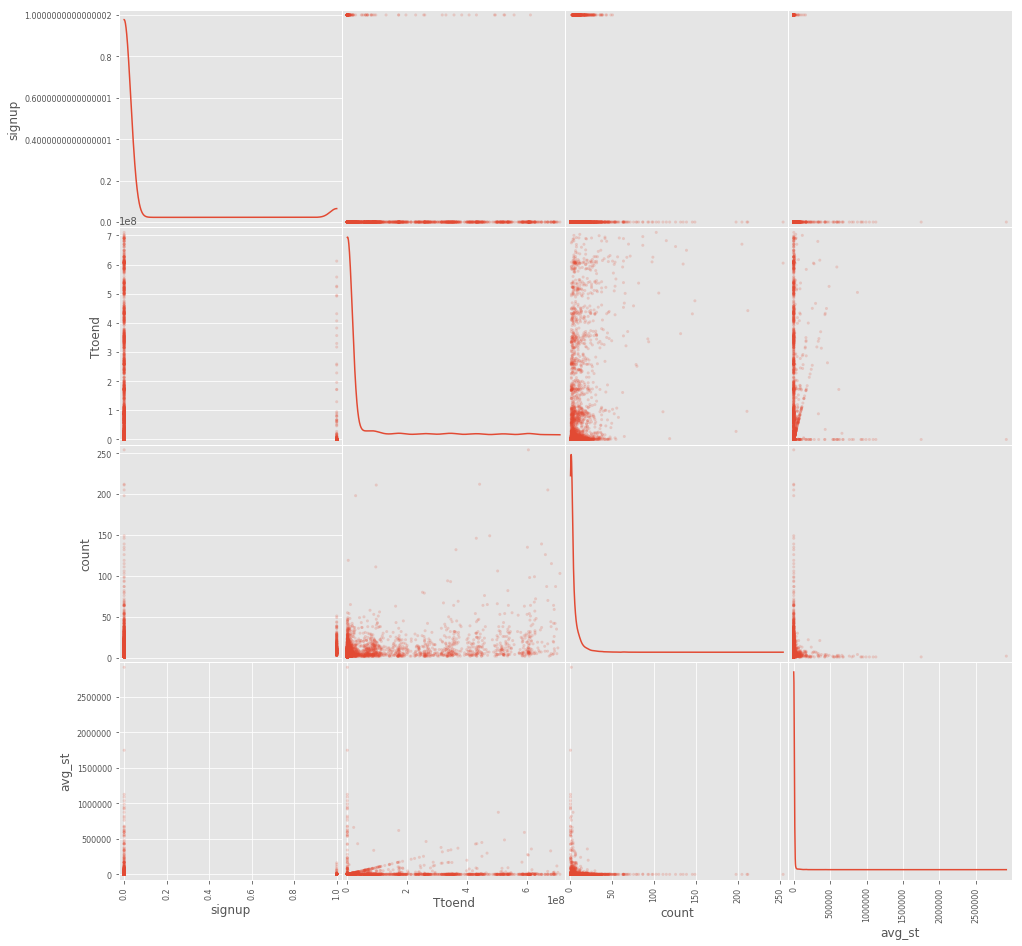

In [13]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df[[u'signup', u'Ttoend', u'count',u'avg_st']], 
               alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.savefig('timescatter_feature_selection.png',bbox_inches="tight",dpi=500)
plt.show()

### Define Features and Target

In [14]:
df['log_st'] = np.log((df.avg_st+1)/1000) 

In [15]:
df['log_Ttoend'] = np.log(df.Ttoend+1) 

In [16]:
df['log_ileave'] = np.log(df.ileave+1) 
df['log_npage'] = np.log(df.npage+1) 
df['log_nclick'] = np.log(df.nclick+1) 

In [17]:
selected_features = [u'count',u'worktime',u'weekend',
                     u'log_st',
                     u'model_bin_mac',u'model_bin_others', u'model_bin_pc', u'os_bin_macosx', u'os_bin_others',
                     u'os_bin_windows', u'CT_bin_Beijing', u'CT_bin_Guangzhou',
                     u'CT_bin_Shanghai', u'CT_bin_others', u'PRO_bin_BJ', u'PRO_bin_GD',
                     u'PRO_bin_SH', u'PRO_bin_ZJ', u'PRO_bin_others', u'source_baidu',
                     u'source_others', u'source_others',u'content_data',u'content_others',u'content_ukcontent',
                     u'medium_cpc', u'medium_others', u'medium_ukmedium',
                     u'log_npage', u'log_nclick', u'log_ileave', 
                     u'log_Ttoend',
                     u'is_fd', u'is_ft', u'CN']
target = u'signup'

In [18]:
X = df[selected_features].values
y = df['signup'].values

In [19]:
X.shape

(11708, 35)

#### Let's Train-test split the data!

In [20]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression model using sklearn

In [21]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l1')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [22]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [23]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [24]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred, title):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig('ROC_' + title + '.png', bbox_inches="tight",dpi=500)
    plt.show()

              train      test
metrics                      
AUC        0.951113  0.953284
Accuracy   0.961562  0.965557
Precision  0.625000  0.763636
Recall     0.230548  0.280000
f1-score   0.336842  0.409756


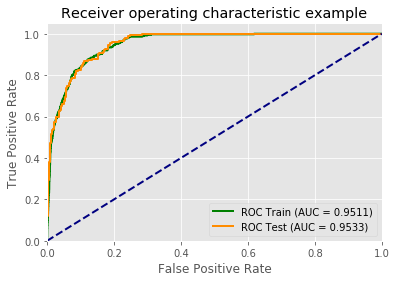

In [25]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, 'LgReg')

##### recall=tp/(tp+fn): for this problem, sign up rate is low, it is expected that we see low tp compared with fn
##### precision=tp/(tp+fp): this metric is more importatn, low precision might due to small number of data amount

Understanding the Estimated Coefficients

In [26]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
29,log_nclick,3.392652
32,is_fd,0.863180
31,log_Ttoend,0.159187
3,log_st,0.106814
0,count,0.047404
13,CT_bin_others,0.039563
15,PRO_bin_GD,0.032775
27,medium_ukmedium,0.000000
25,medium_cpc,0.000000
23,content_others,0.000000


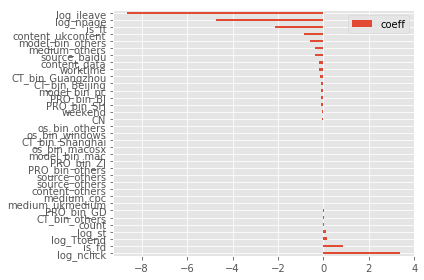

In [27]:
from pylab import rcParams
#plt.barh(y_pos, performance, align='center', alpha=0.5)
ax = df_coeffs.plot.barh(align='center',width=0.35)
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
rcParams['figure.figsize'] = 12, 12
plt.savefig('features.png',bbox_inches="tight",dpi=500)
plt.tight_layout()
plt.show()

### model evaluation

#### confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [29]:
confusion_matrix(y_test, y_test_pred)

array([[3350,   13],
       [ 108,   42]])

In [30]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[7800   48]
 [ 267   80]]


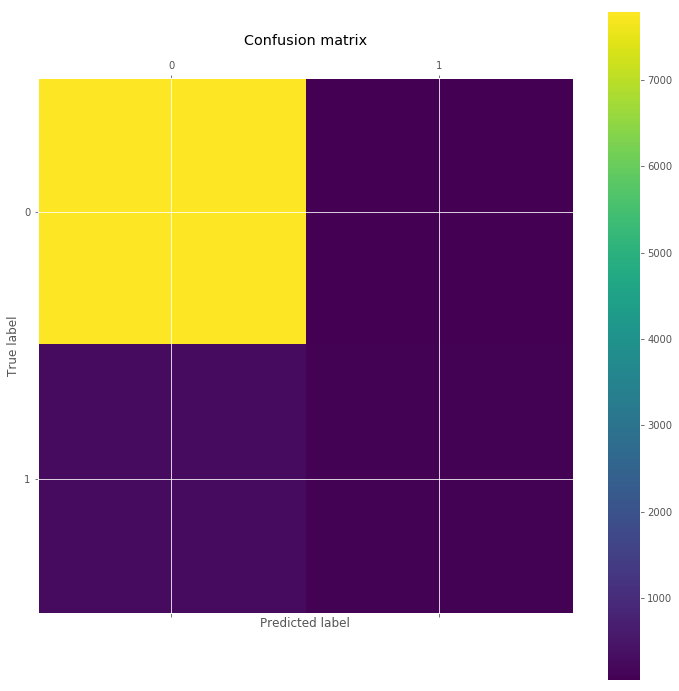

In [31]:
plot_confusion_matrix(y_train, y_train_pred)

[[3350   13]
 [ 108   42]]


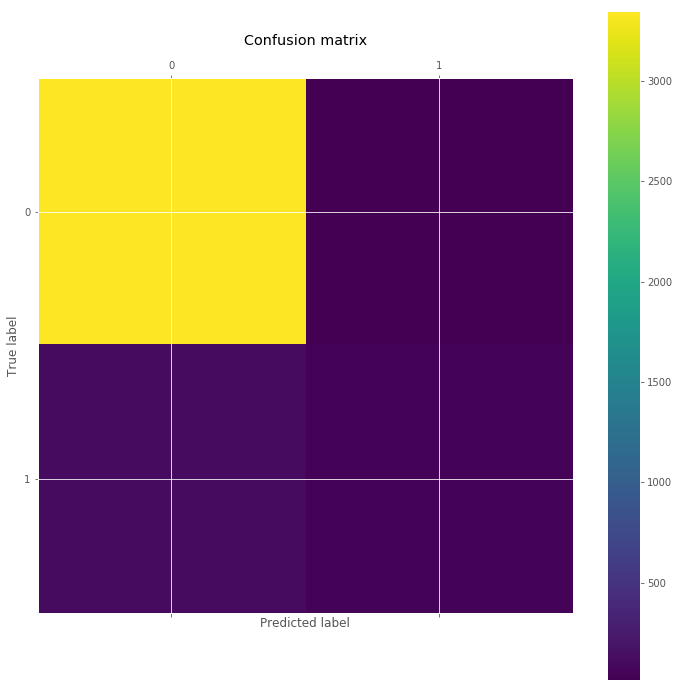

In [32]:
plot_confusion_matrix(y_test, y_test_pred)

In [33]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.6380672019030628


### Bagging
#### Single Tree

              train      test
metrics                      
AUC        0.995534  0.921550
Accuracy   0.985479  0.979789
Precision  0.880000  0.816000
Recall     0.760807  0.680000
f1-score   0.816074  0.741818


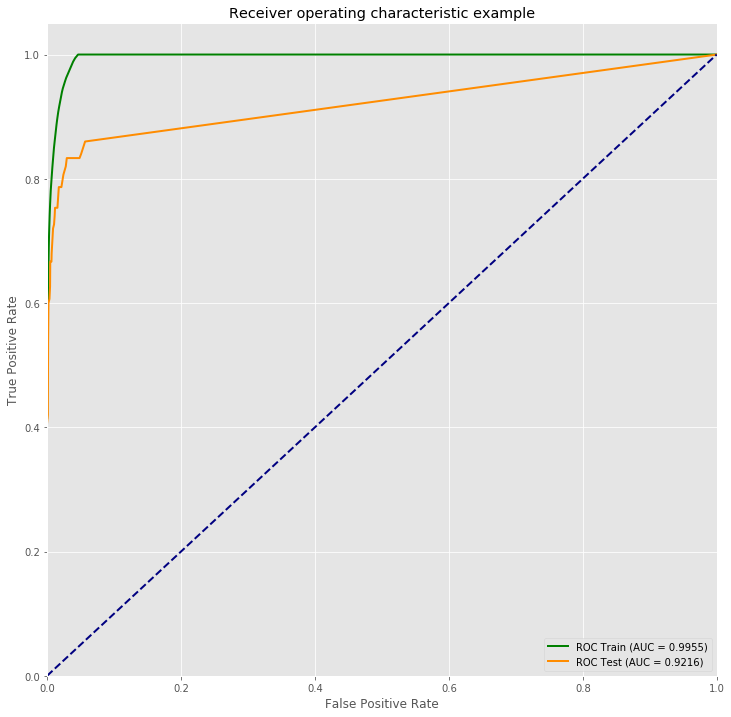

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, 'Single_Tree')

In [37]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test, title):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, title)

#### Bagged Trees

              train      test
metrics                      
AUC        0.996754  0.980669
Accuracy   0.986089  0.982921
Precision  0.960474  0.924528
Recall     0.700288  0.653333
f1-score   0.810000  0.765625


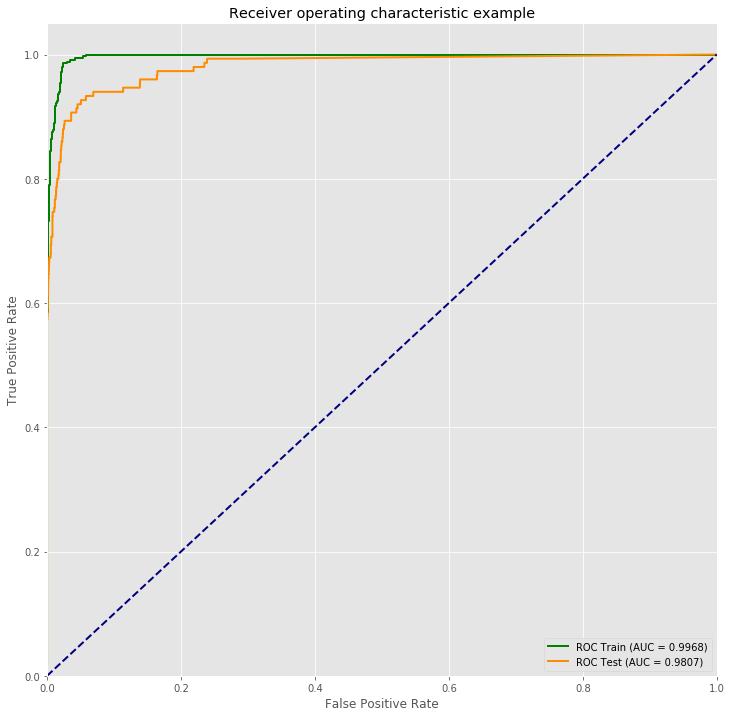

In [38]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Bagged_Tree')

##### bagging is a very useful and effective methods for low amount of data points.

#### Single KNN

              train      test
metrics                      
AUC        0.986976  0.789707
Accuracy   0.974253  0.962141
Precision  0.865591  0.607595
Recall     0.463977  0.320000
f1-score   0.604128  0.419214


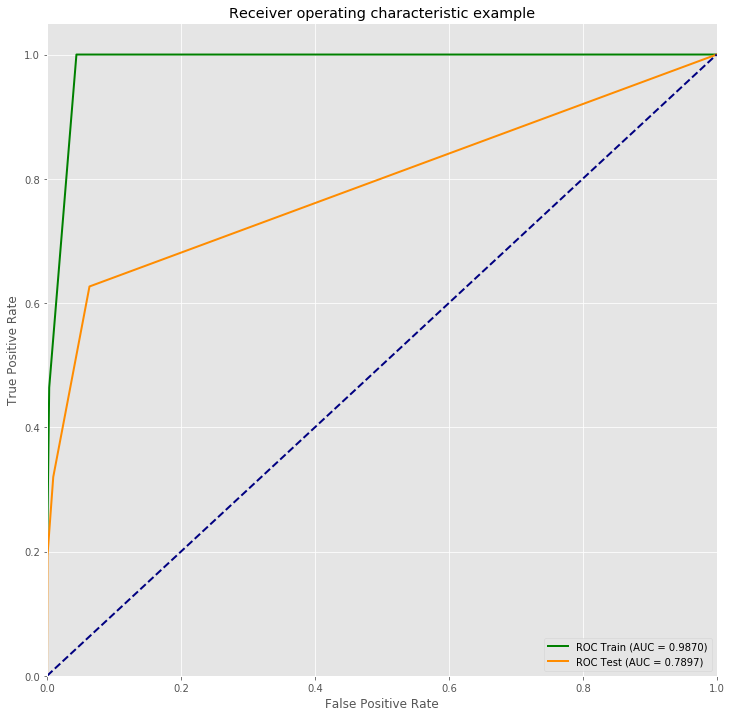

In [39]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Single_KNN')

#### Bagged KNN

              train      test
metrics                      
AUC        0.995139  0.866518
Accuracy   0.975595  0.963279
Precision  0.934911  0.652174
Recall     0.455331  0.300000
f1-score   0.612403  0.410959


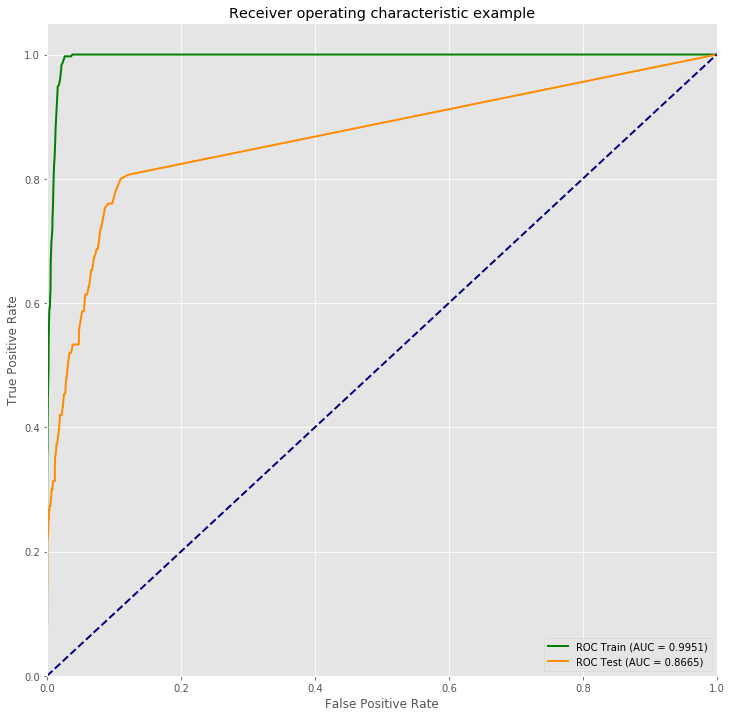

In [40]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Bagged_KNN')

### Random Forest

              train      test
metrics                      
AUC        0.987776  0.972267
Accuracy   0.969494  0.968688
Precision  1.000000  1.000000
Recall     0.279539  0.266667
f1-score   0.436937  0.421053


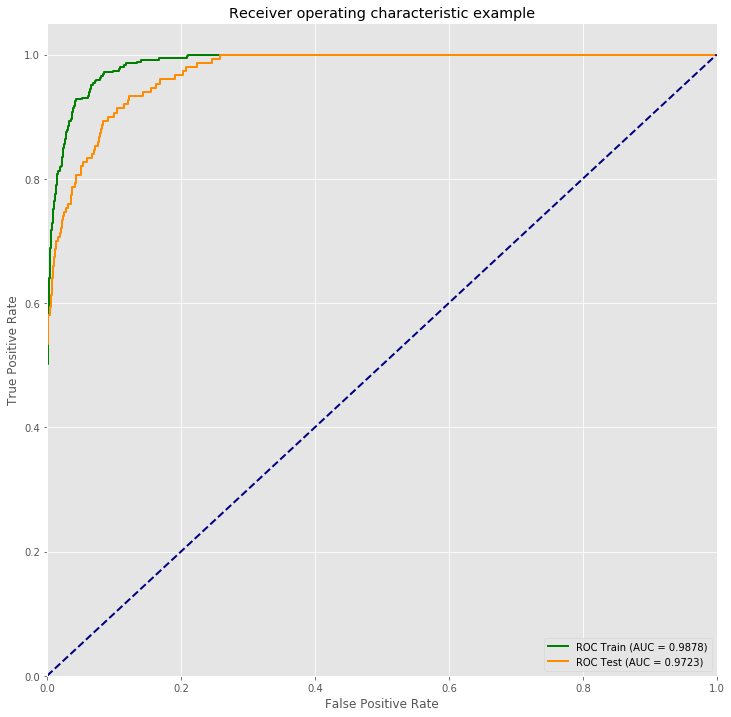

In [41]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Random_Forest')

### Gradient Boosting Trees

              train      test
metrics                      
AUC        1.000000  0.988868
Accuracy   0.999390  0.982351
Precision  1.000000  0.838462
Recall     0.985591  0.726667
f1-score   0.992743  0.778571


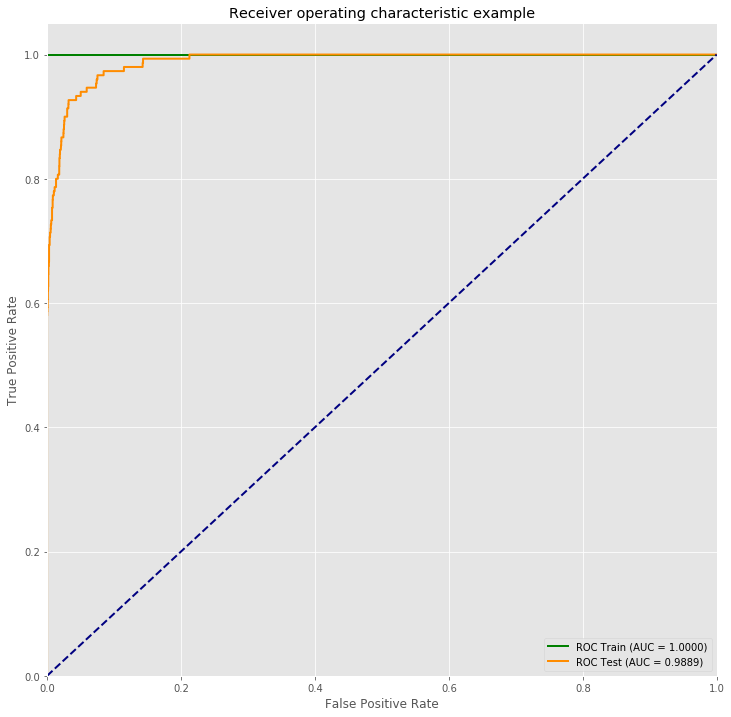

In [42]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient_Boosting')

In [43]:
df_importance = pd.DataFrame(list(zip(selected_features, clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_importance.columns = ['feature', 'importance']
df_importance

,feature,importance
31,log_Ttoend,0.264827
0,count,0.180696
3,log_st,0.172577
28,log_npage,0.159376
29,log_nclick,0.073460
30,log_ileave,0.023906
1,worktime,0.011857
12,CT_bin_Shanghai,0.011041
18,PRO_bin_others,0.010254
17,PRO_bin_ZJ,0.008646


### Neural Network

              train      test
metrics                      
AUC        0.993069  0.989047
Accuracy   0.986699  0.983205
Precision  0.964844  0.925234
Recall     0.711816  0.660000
f1-score   0.819237  0.770428


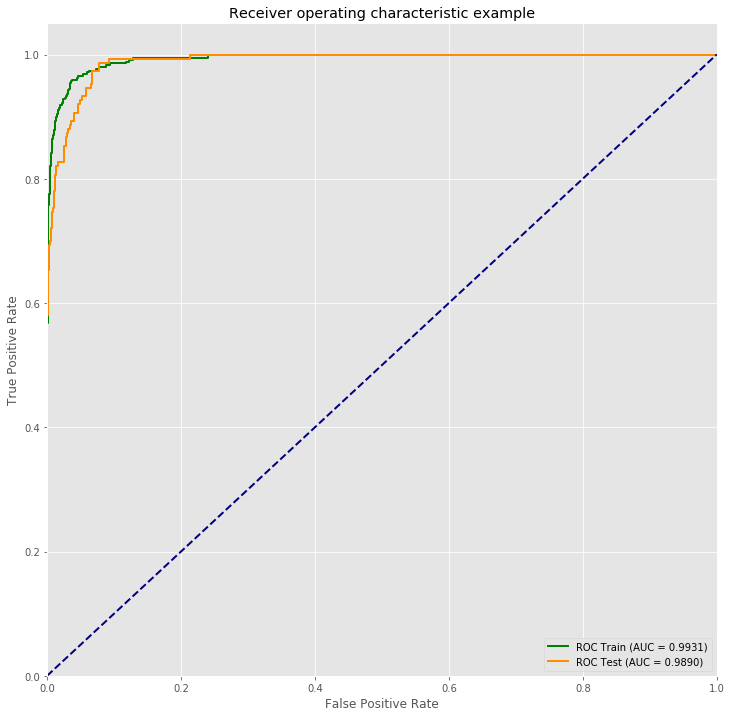

In [44]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'MLP_NN')

### SVM
#### Linear SVM

              train      test
metrics                      
AUC        0.653453  0.667324
Accuracy   0.966687  0.966695
Precision  0.760563  0.739130
Recall     0.311239  0.340000
f1-score   0.441718  0.465753


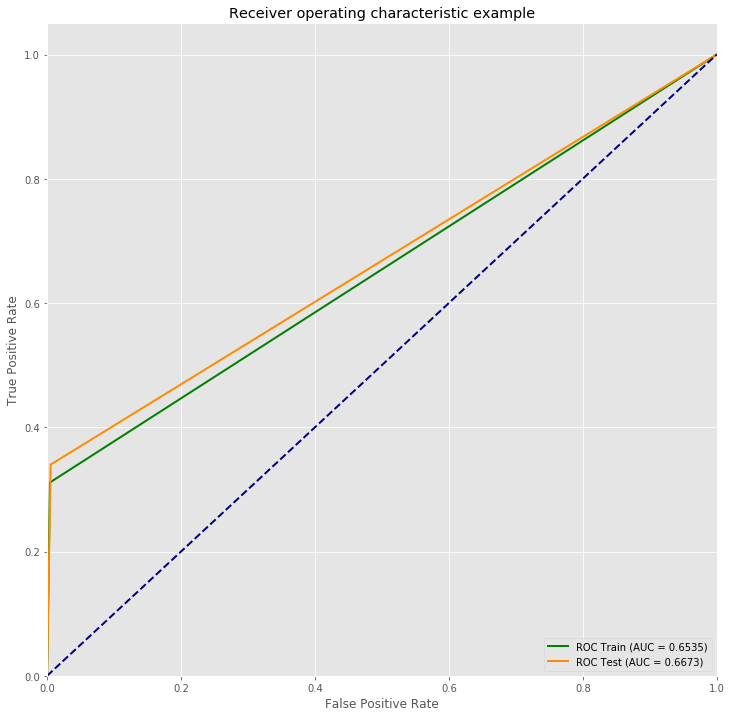

In [45]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, 'Linear_SVM')

#### NonLinear SVM

/Users/leoli/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.985151  0.962865
Accuracy   0.983405  0.982067
Precision  0.934156  0.948454
Recall     0.654179  0.613333
f1-score   0.769492  0.744939


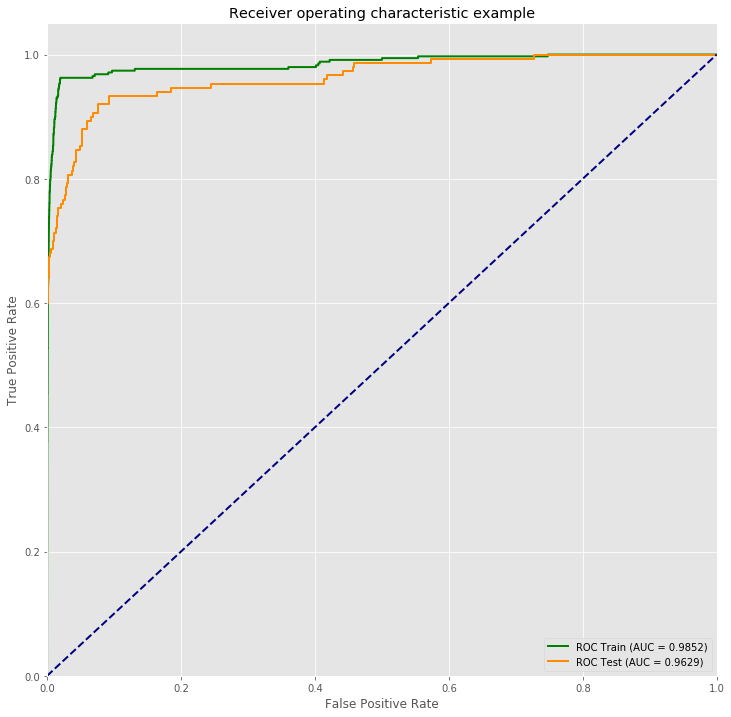

In [46]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'NonLinear_SVM')

### HyperParameter Tuning: Grid Search

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.999978  0.976666
Accuracy   0.987309  0.977227
Precision  1.000000  1.000000
Recall     0.700288  0.466667
f1-score   0.823729  0.636364


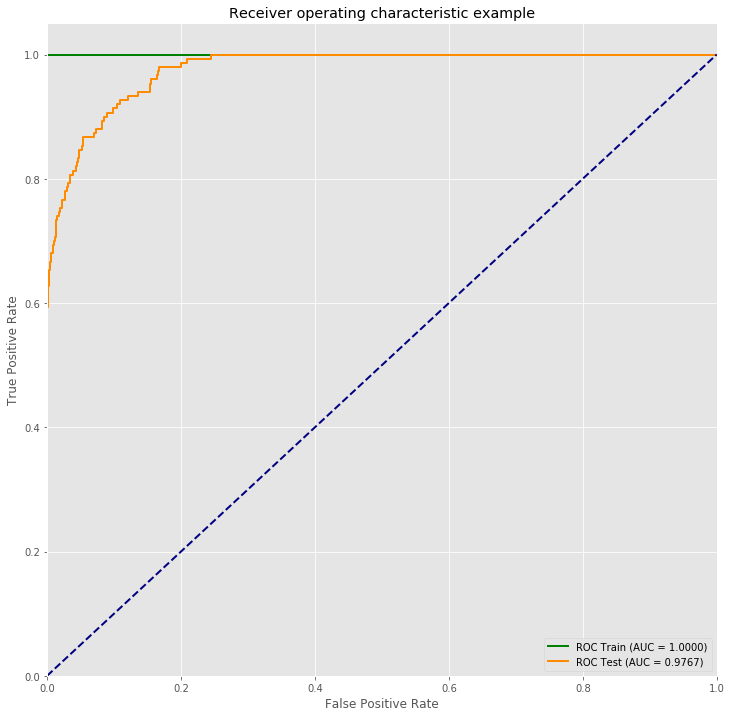

In [48]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'selected_RF_tuned')